# Script pré-traitement des données et apprentissage du thème sur les colonnes titre et description (suppression de tous les doublons)

## Modules à importer

In [1]:
import pandas as pd
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import FrenchStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

## Lecture du fichier CSV et création de la dataframe

In [2]:
opinion_df = pd.read_csv ("./data_website_tab.csv", sep="\t", names=["titre", "description","position","theme"],dtype={"titre":"object","description":"object","position":"category","theme":"category"},header=None)

## Suppression des lignes vides

In [3]:
opinion_df_clean = opinion_df.dropna(how='any')

## Récupération des index des lignes sans texte ne contenant que des espaces

In [4]:
opinion_df_spaces = opinion_df_clean[(opinion_df_clean.description == " ") |(opinion_df_clean.description == "  ")]

## Récupération des index des lignes sans texte ne contenant que des espaces

In [5]:
opinion_df_clean2 = opinion_df_clean.drop(index=opinion_df_spaces.index)

## Remplacement du jeu de données initial par le jeu de données néttoyé

In [6]:
opinion_df= opinion_df_clean2

# Suppression des doublons

## Nombre de lignes pour chaque thème avant suppression des doublons

In [7]:
opinion_df.theme.value_counts()

elevage                    2214
chasse                     1765
zoo-cirque                  748
mer-pisciculture            712
animaux-de-compagnie        687
droit-animal                653
corrida                     511
experimentation-animale     268
Name: theme, dtype: int64

# Nombre total de thèmes avant suppression

In [8]:
opinion_df.theme.count()

7558

In [9]:
opinion_df.head(30)

,titre,description,position,theme
0,Le député Loïc Dombreval demande au gouverneme...,.@LoicDombreval se prononce pour une anticipa...,Agit pour les animaux,elevage
1,Ces maires ont attribué une délégation conditi...,Ces maires ont attribué à un conseiller ou un...,Agit pour les animaux,droit-animal
2,Tribune en faveur de la censure du débat publi...,"Soutien assumé à la convention « Déméter », d...",Agit contre les animaux,elevage
3,Proposition de loi n°1896 visant à abolir l’él...,"En France, il est interdit de fabriquer et ve...",Agit pour les animaux,elevage
4,3 Députés demandent au gouvernement d'intégrer...,Question écrite de M. Dimitri Houbron député ...,Agit pour les animaux,mer-pisciculture
5,3 Députés demandent au gouvernement d'intégrer...,Question écrite de M. Dimitri Houbron député ...,Agit pour les animaux,elevage
6,Le sénateur Arnaud Bazin demande des explicati...,Question écrite n° 18999 de M. Arnaud Bazin ...,Agit pour les animaux,experimentation-animale
7,La ville de Montpellier vote un vœu visant à i...,Le Conseil municipal de la ville de Montpelli...,Agit pour les animaux,zoo-cirque
8,"Éric Piolle, maire de Grenoble, soutient le Ré...",Dans une vidéo publiée sur le compte Twitter ...,Agit pour les animaux,droit-animal
9,"Anne Hidalgo, maire de Paris, et Christophe Na...",À l'occasion de la journée mondiale des anima...,Agit pour les animaux,droit-animal


# Suppression totale de tout texte dupliqué de les colonnes titre et description 

In [10]:
opinion_df_clean3 = opinion_df.drop_duplicates(subset=['titre', 'description'], keep=False)

In [11]:
opinion_df_clean3.head(30)

,titre,description,position,theme
0,Le député Loïc Dombreval demande au gouverneme...,.@LoicDombreval se prononce pour une anticipa...,Agit pour les animaux,elevage
1,Ces maires ont attribué une délégation conditi...,Ces maires ont attribué à un conseiller ou un...,Agit pour les animaux,droit-animal
2,Tribune en faveur de la censure du débat publi...,"Soutien assumé à la convention « Déméter », d...",Agit contre les animaux,elevage
3,Proposition de loi n°1896 visant à abolir l’él...,"En France, il est interdit de fabriquer et ve...",Agit pour les animaux,elevage
6,Le sénateur Arnaud Bazin demande des explicati...,Question écrite n° 18999 de M. Arnaud Bazin ...,Agit pour les animaux,experimentation-animale
7,La ville de Montpellier vote un vœu visant à i...,Le Conseil municipal de la ville de Montpelli...,Agit pour les animaux,zoo-cirque
8,"Éric Piolle, maire de Grenoble, soutient le Ré...",Dans une vidéo publiée sur le compte Twitter ...,Agit pour les animaux,droit-animal
9,"Anne Hidalgo, maire de Paris, et Christophe Na...",À l'occasion de la journée mondiale des anima...,Agit pour les animaux,droit-animal
10,Tours baptise un jardin du nom de l'éléphant F...,Extrait du site de la ville de Tours : Homma...,Agit pour les animaux,droit-animal
11,La ville de Pessac adopte une motion «en faveu...,CONSEIL MUNICIPAL DU MARDI 29 SEPTEMBRE 2020 ...,Agit pour les animaux,droit-animal


# Nombre de lignes pour chaque thème après suppression des doublons

In [12]:
 opinion_df_clean3.theme.value_counts()

elevage                    1719
chasse                     1528
zoo-cirque                  714
animaux-de-compagnie        522
corrida                     467
droit-animal                445
mer-pisciculture            354
experimentation-animale     239
Name: theme, dtype: int64

# Nombre total de thèmes après suppression

In [13]:
 opinion_df_clean3.theme.count()

5988

# Remplacement des index

In [14]:
opinion_df_clean3 = opinion_df_clean3.reset_index(drop=True)

# Remplacement du jeu de données initial par le jeu de données nettoyé

In [15]:
opinion_df = opinion_df_clean3

In [16]:
opinion_df.head()

,titre,description,position,theme
0,Le député Loïc Dombreval demande au gouverneme...,.@LoicDombreval se prononce pour une anticipa...,Agit pour les animaux,elevage
1,Ces maires ont attribué une délégation conditi...,Ces maires ont attribué à un conseiller ou un...,Agit pour les animaux,droit-animal
2,Tribune en faveur de la censure du débat publi...,"Soutien assumé à la convention « Déméter », d...",Agit contre les animaux,elevage
3,Proposition de loi n°1896 visant à abolir l’él...,"En France, il est interdit de fabriquer et ve...",Agit pour les animaux,elevage
4,Le sénateur Arnaud Bazin demande des explicati...,Question écrite n° 18999 de M. Arnaud Bazin ...,Agit pour les animaux,experimentation-animale


# Extraction pour thème

In [17]:
X = opinion_df[["titre", "description"]]
y = opinion_df.theme

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Création des différentes fonctions utilisées

In [19]:
class SingleColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, data_dict):
        return data_dict[self.key]
    
class MultiColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns].to_dict('records')
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

In [20]:
def split_into_tokens_nltk(desc) :
    return word_tokenize(desc)

In [21]:
fs = FrenchStemmer()
def split_into_stems(desc):
    words = word_tokenize(desc)
    return [fs.stem(w) for w in words]

## Liste des nombres et lois + signes de ponctuation

In [22]:
stopwords = open('stopwords_list.txt','r').read().split()
nblaw_stopwords = stopwords+list(string.punctuation)

## Pipeline pour la colonne titre + transformation du texte en sac de mots avec CountVectorizer

In [26]:
titre_vectorizer = CountVectorizer(tokenizer=split_into_stems, lowercase=True, stop_words=nblaw_stopwords, min_df=0.01)
    
titre_pipeline = make_pipeline(
    SingleColumnSelector(key="titre"),
    titre_vectorizer
)

titre_pipeline.fit(X_train)

C:\Users\Jovana\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\Jovana\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['0507', '0529g', '0635', '0714g', '1136', '``', 'ac10', 'ac9', 'agrim1807785', 'amend', 'c-241', 'c087', 'cd', 'cd1', 'cd1018', 'cd113', 'cd117', 'cd136', 'cd149', 'cd150', 'cd155', 'cd157', 'cd158', 'cd159', 'cd160', 'cd161', 'cd162', 'cd163', 'cd164', 'cd165', 'cd168', 'cd169', 'cd173', 'cd18', 'cd205', 'cd211', 'cd220', 'cd224', 'cd225', 'cd255', 'cd256', 'cd260', 'cd262', 'cd30', 'cd314', 'cd329', 'cd338', 'cd350', 'cd351', 'cd353', 'cd356', 'cd362', 'cd367', 'cd369', 'cd372', 'cd373', 'cd385', 'cd389', 'cd403', 'cd409', 'cd448', 'cd466', 'cd487', 

Pipeline(memory=None,
         steps=[('singlecolumnselector', SingleColumnSelector(key='titre')),
                ('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=0.01,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['00001002', '0...
                                             '02070', '02302', '03041', '03242',
                                             '03633', '04654', '0507S', '0529G',
                                             '05860', '06227', '0635S', '06657',
                                             '06942', '0714G', '07714', '07795',
                                             '08060', '08152', 

## Affichage des traits

In [27]:
res = titre_pipeline.transform(X_test.head())
print("Input titre")
print(X_test.titre.head())
print("Output bags of words")

bow = pd.DataFrame(res.toarray(), columns=titre_vectorizer.get_feature_names())
bow.set_index(X_test.head().index, inplace=True)
bow.replace(0, np.nan).dropna(axis=1, how='all').fillna(0)

Input titre
846     2 eurodéputés demandent des aides supplémentai...
510     Le Kremlin-Bicêtre a installé un pigeonnier co...
2937    Des conseillers régionaux d'ACAL participent à...
4079    Proposition de résolution du Parlement europée...
4356    Chantal Jouanno encourage la concertation avec...
Name: titre, dtype: object

Output bags of words


,'',``,a,aid,animal,associ,autoris,avec,bien-êtr,contr,...,proposit,pêch,régional,résolu,san,sur,un,vis,à,étourd
846,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
510,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2937,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4079,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4356,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Pipeline pour la colonne description + transofrmation du texte en vecteurs avec TfidfVectorizer

In [28]:
desc_vectorizer = TfidfVectorizer(tokenizer=split_into_stems,lowercase=True,min_df=0.01)

description_pipeline = make_pipeline(
    SingleColumnSelector(key="description"),
    desc_vectorizer
)

description_pipeline.fit(X_train)

C:\Users\Jovana\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Pipeline(memory=None,
         steps=[('singlecolumnselector',
                 SingleColumnSelector(key='description')),
                ('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=0.01, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function split_into_stems at 0x0000014D5C62FA68>,
                                 use_idf=True, vocabulary=None))],
         ver

## Affichage des traits

In [30]:
res = description_pipeline.transform(X_test.head())
print("Input descriptions")
print(X_test.description.head())
print("Output bags of words")

bow = pd.DataFrame(res.toarray(), columns=desc_vectorizer.get_feature_names())
bow.set_index(X_test.head().index, inplace=True)
bow.replace(0, np.nan).dropna(axis=1, how='all').fillna(0)

Input descriptions
846      La modernisation de la flotte (plus de 230 na...
510       Le dispositif accueille surtout des pigeons ...
2937     Article de Jordan Grosse-Cruciani : Manifesta...
4079     Le Parlement européen [...] considérant que l...
4356     Suite à une enquête réalisée en 2014 par l'as...
Name: description, dtype: object

Output bags of words


,%,'',(,),",",.,...,1.,14,15,...,étaient,étant,état,étourd,évit,évolu,être,œuvr,–,’
846,0.000000,0.000000,0.106149,0.106149,0.134472,0.093702,0.000000,0.000000,0.000000,0.073501,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
510,0.081692,0.000000,0.033865,0.033865,0.178207,0.119577,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.138328
2937,0.000000,0.000000,0.073217,0.073217,0.192642,0.064632,0.000000,0.000000,0.121977,0.000000,...,0.272549,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
4079,0.033134,0.031724,0.013736,0.013736,0.168655,0.012125,0.051641,0.051131,0.000000,0.000000,...,0.000000,0.094579,0.034235,0.049517,0.1417,0.000000,0.000000,0.000000,0.076345,0.000000
4356,0.000000,0.000000,0.013573,0.013573,0.202361,0.155753,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.039699,0.024308,0.040435,0.000000,0.000000


## Statistique textuelles + Pipeline

In [31]:
class TextStats(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self

    def transform(self, descs):
        return [{'stats_length': len(text),
                 'stats_num_sentences': text.count('.')+text.count('!')+text.count('?')}
                for text in descs]
    
stats_vectorizer = DictVectorizer()

stats_pipeline = make_pipeline(
    SingleColumnSelector(key="description"),
    TextStats(),
    stats_vectorizer
)

stats_pipeline.fit(X_train)

Pipeline(memory=None,
         steps=[('singlecolumnselector',
                 SingleColumnSelector(key='description')),
                ('textstats', TextStats()),
                ('dictvectorizer',
                 DictVectorizer(dtype=<class 'numpy.float64'>, separator='=',
                                sort=True, sparse=True))],
         verbose=False)

## Application de la pipeline pour les 5 premières instances de X_test

In [32]:
res = stats_pipeline.transform(X_test.head())
print("Input")
print(X_test.description.head())
print("Output")

stats = pd.DataFrame(res.toarray(), columns=stats_vectorizer.get_feature_names())
stats.set_index(X_test.head().index)

Input
846      La modernisation de la flotte (plus de 230 na...
510       Le dispositif accueille surtout des pigeons ...
2937     Article de Jordan Grosse-Cruciani : Manifesta...
4079     Le Parlement européen [...] considérant que l...
4356     Suite à une enquête réalisée en 2014 par l'as...
Name: description, dtype: object

Output


,stats_length,stats_num_sentences
846,1754.0,10.0
510,809.0,4.0
2937,588.0,2.0
4079,2175.0,14.0
4356,2448.0,14.0


## Union des pipelines

In [33]:
union = FeatureUnion(transformer_list= [
    ("description_features", description_pipeline),
    ("titre_features", titre_pipeline),
    ("stats_features", stats_pipeline)
])

preprocess_pipeline = make_pipeline(
        union
)

preprocess_pipeline.fit(X_train)

C:\Users\Jovana\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Pipeline(memory=None,
         steps=[('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('description_features',
                                                 Pipeline(memory=None,
                                                          steps=[('singlecolumnselector',
                                                                  SingleColumnSelector(key='description')),
                                                                 ('tfidfvectorizer',
                                                                  TfidfVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.float64'>,
                                                              

## Application de la pipeline pour les 5 premières instances de X_test

In [34]:
res = preprocess_pipeline.transform(X_test.head())
print("Input")
print(X_test.head())
print("Output")

all_features = pd.DataFrame(res.toarray(), 
                            columns=description_pipeline.named_steps['tfidfvectorizer'].get_feature_names()
                            + titre_pipeline.named_steps['countvectorizer'].get_feature_names()
                            + stats_pipeline.named_steps['dictvectorizer'].get_feature_names()
                           )
all_features.set_index(X_test.head().index, inplace=True)
all_features.replace(0, np.nan).dropna(axis=1, how='all').fillna(0)

Input
                                                  titre  \
846   2 eurodéputés demandent des aides supplémentai...   
510   Le Kremlin-Bicêtre a installé un pigeonnier co...   
2937  Des conseillers régionaux d'ACAL participent à...   
4079  Proposition de résolution du Parlement europée...   
4356  Chantal Jouanno encourage la concertation avec...   

                                            description  
846    La modernisation de la flotte (plus de 230 na...  
510     Le dispositif accueille surtout des pigeons ...  
2937   Article de Jordan Grosse-Cruciani : Manifesta...  
4079   Le Parlement européen [...] considérant que l...  
4356   Suite à une enquête réalisée en 2014 par l'as...  

Output


,%,'',(,),",",.,...,1.,14,15,...,régional,résolu,san,sur,un,vis,à,étourd,stats_length,stats_num_sentences
846,0.000000,0.000000,0.106149,0.106149,0.134472,0.093702,0.000000,0.000000,0.000000,0.073501,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1754.0,10.0
510,0.081692,0.000000,0.033865,0.033865,0.178207,0.119577,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,809.0,4.0
2937,0.000000,0.000000,0.073217,0.073217,0.192642,0.064632,0.000000,0.000000,0.121977,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,588.0,2.0
4079,0.033134,0.031724,0.013736,0.013736,0.168655,0.012125,0.051641,0.051131,0.000000,0.000000,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2175.0,14.0
4356,0.000000,0.000000,0.013573,0.013573,0.202361,0.155753,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2448.0,14.0


## Affichage du nombre de traits générés par chacune des chaines

In [35]:
fnames_titre = titre_pipeline.named_steps['countvectorizer'].get_feature_names()
fnames_desc = description_pipeline.named_steps['tfidfvectorizer'].get_feature_names()
fnames_stat = stats_pipeline.named_steps['dictvectorizer'].get_feature_names()
print('Nombres de traits extraits à partir de la colonne titre :', len(fnames_titre))
print('Nombres de traits extraits à partir de la colonne description :', len(fnames_desc))
print('Nombres de traits statistiques :', len(fnames_stat))

Nombres de traits extraits à partir de la colonne titre : 203
Nombres de traits extraits à partir de la colonne description : 2252
Nombres de traits statistiques : 2


## Comparaison des modèles

Mutinomial NB
                         precision    recall  f1-score   support

   animaux-de-compagnie       0.86      0.61      0.72       522
                 chasse       0.87      0.86      0.86      1528
                corrida       0.67      0.79      0.72       467
           droit-animal       0.72      0.51      0.60       445
                elevage       0.71      0.81      0.75      1719
experimentation-animale       0.31      0.49      0.38       239
       mer-pisciculture       0.86      0.56      0.68       354
             zoo-cirque       0.89      0.81      0.85       714

               accuracy                           0.75      5988
              macro avg       0.73      0.68      0.70      5988
           weighted avg       0.77      0.75      0.76      5988

accuracy 0.7495826377295493
confusion matrix
                          animaux-de-compagnie  chasse  corrida  droit-animal  \
animaux-de-compagnie                       62       5        5             4 

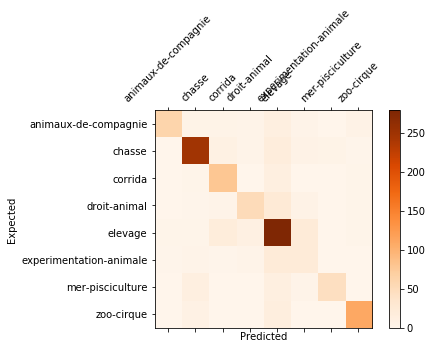

KNN
                         precision    recall  f1-score   support

   animaux-de-compagnie       0.11      0.14      0.12       522
                 chasse       0.29      0.44      0.35      1528
                corrida       0.15      0.09      0.11       467
           droit-animal       0.20      0.09      0.12       445
                elevage       0.36      0.37      0.36      1719
experimentation-animale       0.20      0.07      0.10       239
       mer-pisciculture       0.11      0.03      0.05       354
             zoo-cirque       0.39      0.29      0.33       714

               accuracy                           0.28      5988
              macro avg       0.22      0.19      0.19      5988
           weighted avg       0.27      0.28      0.27      5988

accuracy 0.27629382303839733
confusion matrix
                          animaux-de-compagnie  chasse  corrida  droit-animal  \
animaux-de-compagnie                        9      43        7             3   
chasse

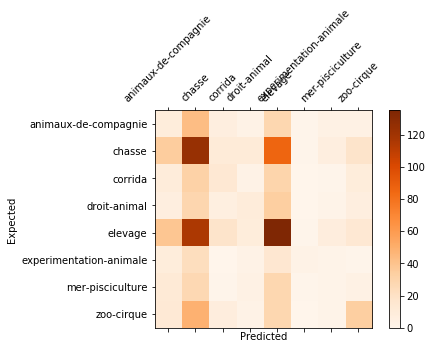

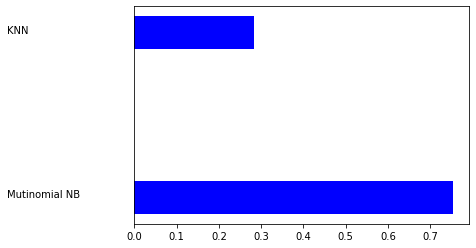

In [36]:
models = [
    ('Mutinomial NB', MultinomialNB()),
    ('KNN', KNeighborsClassifier()),
]

# Evaluation de chaque résultat l'un après l'autre
scores = []
names = []
scoring = 'accuracy'

# Validation croisée à 5 plis
kfold = model_selection.KFold(n_splits=5, shuffle=True)
for name, model in models:
    names.append(name)
    print(name)
    model_pipeline = make_pipeline(preprocess_pipeline,model)
    y_pred = model_selection.cross_val_predict(model_pipeline, X, y, 
                                               cv=kfold, n_jobs=2)
    print(classification_report(y, y_pred))
    acc = metrics.accuracy_score(y, y_pred)
    scores.append(acc)
    model_pipeline.fit(X_train, y_train)
    all_predictions = model_pipeline.predict(X_test)
    
    # all_predictions : classes prédites par l'algorithme d'apprentissage pour les données de test
    print('accuracy', accuracy_score(y_test, all_predictions))
    
    # Liste des labels (classes) se trouvant dans les données de test
    labels = np.unique(y_test)
    
    # Matrice de confusion
    cm =  confusion_matrix(y_test, all_predictions, labels=labels)
    
    # Matrice de confusion sous forme de DataFrame
    confusion_df = pd.DataFrame(cm, index=labels, columns=labels)
    print('confusion matrix\n', confusion_df)
    print('(row=expected, col=predicted)')
    labels = np.unique(y_test)
    cm = confusion_matrix(y_test, all_predictions, labels) 
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    cax = ax.matshow(cm, interpolation='nearest', cmap=plt.cm.Oranges) 
    fig.colorbar(cax) 
    tick_marks = np.arange(len(labels))
    labels_for_fig = [l for l in labels]
    plt.xticks(tick_marks, labels_for_fig, rotation=45)
    plt.yticks(tick_marks, labels_for_fig) 
    plt.xlabel('Predicted') 
    plt.ylabel('Expected') 
    plt.show()
    
# Représentation graphique
indices = np.arange(len(scores))
fig = plt.figure()
plt.barh(indices, scores, .2, label="score", color='b')
plt.yticks(())
for i, c in zip(indices, names):
    plt.text(-.3, i, c)
plt.show()

## Chaîne de prétraitement globale, sans les traits concernant les statistiques

In [31]:
union = FeatureUnion(transformer_list = [
        ("titre_feature", titre_pipeline),
        ("description_feature", description_pipeline),
    ])

preprocess_pipeline = make_pipeline(
    union
)

preprocess_pipeline.fit(X_train)

C:\Users\Jovana\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Pipeline(memory=None,
         steps=[('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('titre_feature',
                                                 Pipeline(memory=None,
                                                          steps=[('singlecolumnselector',
                                                                  SingleColumnSelector(key='titre')),
                                                                 ('countvectorizer',
                                                                  CountVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.int64'>,
                                                                             

## Application de la pipeline pour les 5 premières instances de X_test

In [32]:
res = preprocess_pipeline.transform(X_test.head())
print("Input")
print(X_test.head())
print("Output")

all_features = pd.DataFrame(res.toarray(), 
                            columns=description_pipeline.named_steps['tfidfvectorizer'].get_feature_names()
                            + titre_pipeline.named_steps['countvectorizer'].get_feature_names()
                           )
all_features.set_index(X_test.head().index, inplace=True)
all_features.replace(0, np.nan).dropna(axis=1, how='all').fillna(0)

Input
                                                  titre  \
2041  Nicolas Dupont Aignan se réjouit de la nominat...   
407   VoteForAnimals2019 : ces eurodéputés ne se son...   
3367  Younous Omarjee souhaite que le Japon soit pou...   
5752  Mélenchon et le Front de Gauche : contre la ch...   
2394  AnimalPolitique 26 : ces candidats à la présid...   

                                            description  
2041   Philippe Martin vient de remplacer Hubert Ree...  
407    Point de l'engagement proposé aux candidats à...  
3367   Dans l'arrêt qu'elle a rendu le 31 mars 2014,...  
5752   En réponse au questionnaire adressé par L214 ...  
2394   26. Réintégrer la notion de respect des anima...  

Output


,1.,1/2005,15,150,16,2004,2007,2015,2015.,29,...,que,régional,s'oppos,stérilis,subvent,subvention,un,vach,«,élevag
2041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
407,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.100339,0.061418,0.163295,0.188271,0.00000,0.070507,0.000000,0.040302,0.111198,0.253610
3367,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.08223,0.000000,0.000000,0.000000,0.019980,0.000000
5752,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,...,0.105189,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2394,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,...,0.000000,0.073589,0.000000,0.000000,0.00000,0.000000,0.079656,0.000000,0.000000,0.202578


## Affichage du nombre de traits générés par chacune des chaines 

In [33]:
fnames_titre = titre_pipeline.named_steps['countvectorizer'].get_feature_names()
fnames_desc = description_pipeline.named_steps['tfidfvectorizer'].get_feature_names()
print('Nombres de traits extraits à partir de la colonne titre :', len(fnames_titre))
print('Nombres de traits extraits à partir de la colonne description :', len(fnames_desc))

Nombres de traits extraits à partir de la colonne titre : 201
Nombres de traits extraits à partir de la colonne description : 2241


## Comparaison des modèles

Mutinomial NB
                         precision    recall  f1-score   support

   animaux-de-compagnie       0.89      0.77      0.82       522
                 chasse       0.84      0.93      0.88      1528
                corrida       0.94      0.87      0.90       467
           droit-animal       0.71      0.78      0.74       445
                elevage       0.86      0.94      0.90      1719
experimentation-animale       0.87      0.51      0.64       239
       mer-pisciculture       0.90      0.61      0.73       354
             zoo-cirque       0.92      0.85      0.88       714

               accuracy                           0.86      5988
              macro avg       0.87      0.78      0.81      5988
           weighted avg       0.86      0.86      0.85      5988

accuracy 0.8672787979966611
confusion matrix
                          animaux-de-compagnie  chasse  corrida  droit-animal  \
animaux-de-compagnie                       72       5        1             9 

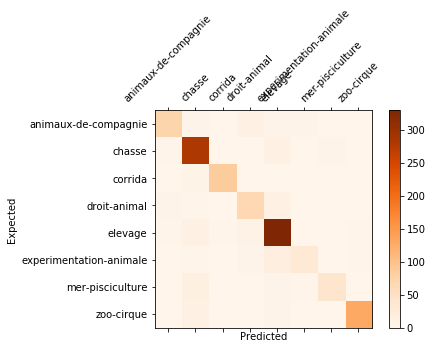

KNN
                         precision    recall  f1-score   support

   animaux-de-compagnie       0.47      0.63      0.54       522
                 chasse       0.65      0.84      0.73      1528
                corrida       0.68      0.72      0.70       467
           droit-animal       0.60      0.56      0.58       445
                elevage       0.77      0.68      0.72      1719
experimentation-animale       0.59      0.30      0.40       239
       mer-pisciculture       0.70      0.38      0.50       354
             zoo-cirque       0.89      0.75      0.82       714

               accuracy                           0.68      5988
              macro avg       0.67      0.61      0.62      5988
           weighted avg       0.70      0.68      0.68      5988

accuracy 0.6769616026711185
confusion matrix
                          animaux-de-compagnie  chasse  corrida  droit-animal  \
animaux-de-compagnie                       63      12        1             9   
chasse 

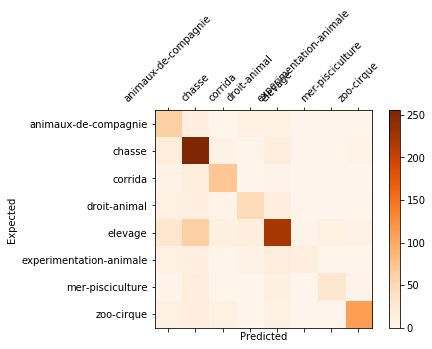

SVM
                         precision    recall  f1-score   support

   animaux-de-compagnie       0.85      0.86      0.85       522
                 chasse       0.91      0.95      0.93      1528
                corrida       0.93      0.91      0.92       467
           droit-animal       0.80      0.81      0.81       445
                elevage       0.91      0.95      0.93      1719
experimentation-animale       0.90      0.77      0.83       239
       mer-pisciculture       0.92      0.77      0.83       354
             zoo-cirque       0.97      0.91      0.94       714

               accuracy                           0.91      5988
              macro avg       0.90      0.87      0.88      5988
           weighted avg       0.91      0.91      0.91      5988

accuracy 0.9156928213689483
confusion matrix
                          animaux-de-compagnie  chasse  corrida  droit-animal  \
animaux-de-compagnie                       84       3        2             3   
chasse 

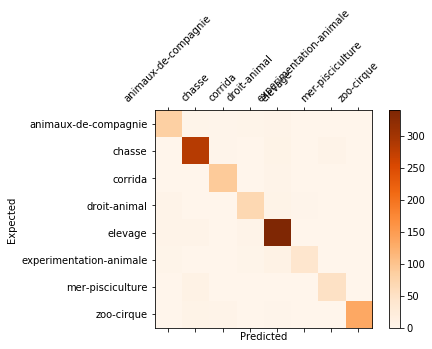

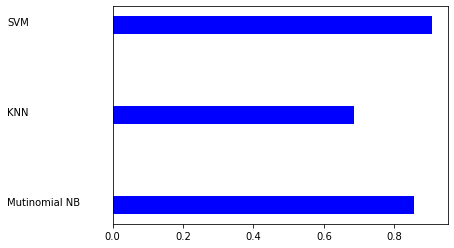

In [34]:
models = [
    ('Mutinomial NB', MultinomialNB()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', svm.SVC(kernel='linear'))

]
# Evaluation de chaque résultat l'un après l'autre
scores = []
names = []
scoring = 'accuracy'

# Validation croisée à 5 plis
kfold = model_selection.KFold(n_splits=5, shuffle=True)
for name, model in models:
    names.append(name)
    print(name)
    model_pipeline = make_pipeline(preprocess_pipeline,model)
    y_pred = model_selection.cross_val_predict(model_pipeline, X, y, 
                                               cv=kfold, n_jobs=2)
    print(classification_report(y, y_pred))
    acc = metrics.accuracy_score(y, y_pred)
    scores.append(acc)
    model_pipeline.fit(X_train, y_train)
    all_predictions = model_pipeline.predict(X_test)
    
    # all_predictions : classes prédites par l'algorithme d'apprentissage pour les données de test
    print('accuracy', accuracy_score(y_test, all_predictions))
    
    # Liste des labels (classes) se trouvant dans les données de test
    labels = np.unique(y_test)
    
    # Matrice de confusion
    cm =  confusion_matrix(y_test, all_predictions, labels=labels)
    
    # Matrice de confusion sous forme de DataFrame
    confusion_df = pd.DataFrame(cm, index=labels, columns=labels)
    print('confusion matrix\n', confusion_df)
    print('(row=expected, col=predicted)')
    labels = np.unique(y_test)
    cm = confusion_matrix(y_test, all_predictions, labels) 
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    cax = ax.matshow(cm, interpolation='nearest', cmap=plt.cm.Oranges) 
    fig.colorbar(cax) 
    tick_marks = np.arange(len(labels))
    labels_for_fig = [l for l in labels]
    plt.xticks(tick_marks, labels_for_fig, rotation=45)
    plt.yticks(tick_marks, labels_for_fig) 
    plt.xlabel('Predicted') 
    plt.ylabel('Expected') 
    plt.show()
    
# Représentation graphique
indices = np.arange(len(scores))
fig = plt.figure()
plt.barh(indices, scores, .2, label="score", color='b')
plt.yticks(())
for i, c in zip(indices, names):
    plt.text(-.3, i, c)
plt.show()